<a href="https://colab.research.google.com/github/ArthAgrawal/Brain-Tumor-Research-Paper/blob/main/Brain_Tumor_Research_Balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_44'


In [3]:
import os
class_counts = {}
for class_folder in os.listdir(dataset_folder_path):
    class_path = os.path.join(dataset_folder_path, class_folder)

    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_folder] = num_images

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")


Class: Carcinoma T1, Number of images: 65
Class: Oligodendroglioma T1, Number of images: 86
Class: Tuberculoma T1, Number of images: 28
Class: Meduloblastoma T1, Number of images: 23
Class: Papiloma T1, Number of images: 66
Class: Ependimoma T1, Number of images: 45
Class: Neurocitoma T1, Number of images: 130
Class: Granuloma T1, Number of images: 30
Class: Ganglioglioma T1, Number of images: 20
Class: Schwannoma T1, Number of images: 148
Class: _NORMAL T1, Number of images: 251
Class: Glioblastoma T1, Number of images: 55
Class: Meningioma T1, Number of images: 272
Class: Germinoma T1, Number of images: 27
Class: Astrocitoma T1, Number of images: 176


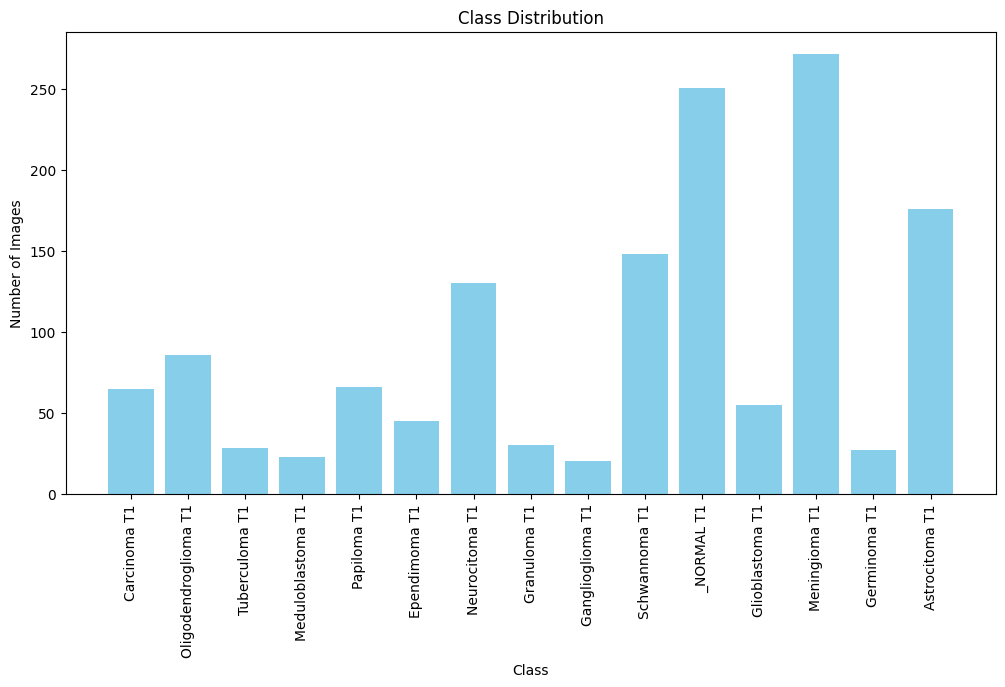

In [4]:
import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


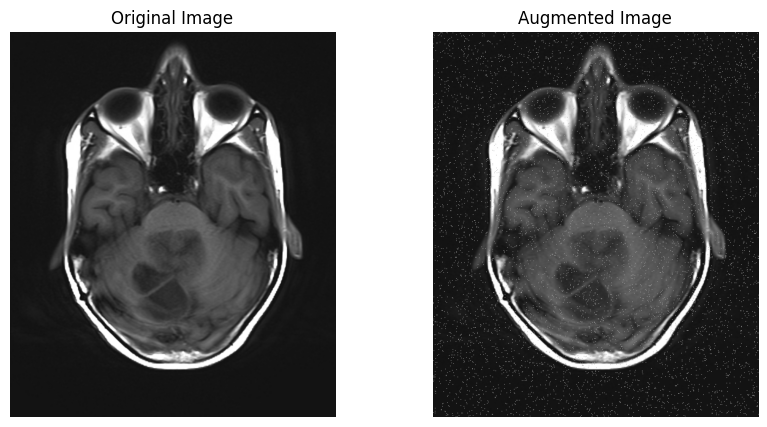

In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the augmentation pipeline
augmentation_pipeline = A.Compose([
    A.PixelDropout(dropout_prob=0.02, per_channel=0, drop_value=random.uniform(150, 210), p=1.0)
])

# Load and process the image
image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meduloblastoma T1/88af9ded70b91ac826f6cab684a34f5970082d80b13dbc2b5249f8bd77a1a7b8_big_gallery.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply augmentation
augmented = augmentation_pipeline(image=image)
augmented_image = augmented['image']

# Function to display images
def display_images(original, augmented):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Augmented Image")
    plt.imshow(augmented)
    plt.axis("off")

    plt.show()

# Display original and augmented images
display_images(image, augmented_image)

In [ ]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def create_augmentation_pipeline():
    return A.Compose([
        A.CLAHE(clip_limit=(1, 10), tile_grid_size=(8, 8), p=0.3),
        # A.ChannelDropout(channel_drop_range=(1,2), fill_value=150, p=0.2),
        A.Defocus(radius=(3.10), p=0.4),
        A.Downscale(p=0.5, scale_min=0.5,	scale_max=0.9),
        #A.ElasticTransform(p=0.5, alpha=9.00, sigma=180, interpolation=0, border_mode=0),
        A.GaussianBlur(p=0.4, blur_limit=(3,5), sigma_limit=(0.5,1.5)),
        # A.GridDistortion(p=0.4, num_steps=10, distort_limit=(-0.3,0.3), border_mode=0),
        A.HorizontalFlip(p=0.3),
        # A.VerticalFlip(p=0.3),
        A.HueSaturationValue(p=0.3, hue_shift_limit=(-20, 61), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
        # A.ImageCompression(p=0.2, quality_lower=50, quality_upper=10, compression_type=1),
        # A.InvertImg(p=0.2),
        # A.OpticalDistortion(p=0.2, distort_limit=(-0.3,0.3), shift_limit=(-0.2,0.2), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None),
        # A.Perspective(p=0.3, scale=(0.05, 0.2), keep_size=0, pad_mode=0, pad_val=(0, 0, 0), mask_pad_val=0, fit_output=0, interpolation=0),
        # A.PixelDropout(p=0.2, dropout_prob=0.01, per_channel=0, drop_value=0.0, mask_drop_value=None),
        A.RandomBrightnessContrast(p=0.3, brightness_limit=(-0.15,0.15), contrast_limit=(-0.2,0.2), brightness_by_max=True),
        # A.RandomCropFromBorders(p=0.2, crop_left=0.1, crop_right=0.1, crop_top=0.15, crop_bottom=0.25),
        A.RandomGamma(p=0.4, gamma_limit=(32, 73)),
        A.Transpose(p=0.5),
        A.ZoomBlur(p=0.1, max_factor=(1.0, 1.1), step_factor=(0.01, 0.03))
    ])


dataset_path = '/content/drive/MyDrive/Brain_Tumor_44/Germinoma T1/'
class_label = 'Germinoma T1'


image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpeg','.jpg')]


print(f"Total images found: {len(image_files)}")
print(f"First few image filenames: {image_files[:5]}")


num_images_to_sample = min(len(image_files), 5)


selected_images = random.sample(image_files, num_images_to_sample)


print(f"Selected images: {selected_images}")

def process_image(image_path, augmentation_pipeline):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    augmented = augmentation_pipeline(image=image)
    return augmented['image']

augmentation_pipeline = create_augmentation_pipeline()


def display_augmented_images(images, class_label):
    plt.figure(figsize=(15, 10))

    for idx, img_path in enumerate(images):
        full_image_path = os.path.join(dataset_path, img_path)
        print(f"Processing image: {full_image_path}")
        augmented_image = process_image(full_image_path, augmentation_pipeline)

        plt.subplot(5, 2, 2 * idx + 1)
        plt.title(f"Original {class_label}")
        original_image = cv2.imread(full_image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        plt.imshow(original_image)
        plt.axis("off")

        plt.subplot(5, 2, 2 * idx + 2)
        plt.title(f"Augmented {class_label}")
        plt.imshow(augmented_image)
        plt.axis("off")

    plt.show()

display_augmented_images(selected_images, class_label)

In [6]:
import albumentations as A
import cv2
import numpy as np
import os
import random

def create_augmentation_pipeline():
    return A.Compose([
        A.CLAHE(clip_limit=(1, 10), tile_grid_size=(8, 8), p=0.3),
        A.Defocus(radius=(3.10), p=0.4),
        A.Downscale(p=0.5, scale_min=0.5, scale_max=0.9),
        A.GaussianBlur(p=0.4, blur_limit=(3, 5), sigma_limit=(0.5, 1.5)),
        A.HorizontalFlip(p=0.3),
        A.HueSaturationValue(p=0.3, hue_shift_limit=(-20, 61), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
        A.RandomBrightnessContrast(p=0.3, brightness_limit=(-0.15, 0.15), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
        A.RandomGamma(p=0.4, gamma_limit=(32, 73)),
        A.Transpose(p=0.5),
        A.ZoomBlur(p=0.1, max_factor=(1.0, 1.1), step_factor=(0.01, 0.03))
    ])

def augment_images_for_class(image_paths, output_dir, target_size=400):
    augmentation_pipeline = create_augmentation_pipeline()

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    log_file_path = os.path.join(output_dir, "augmentation_log.txt")
    with open(log_file_path, 'w') as log_file:
        log_file.write("Image Filename, Augmentation Applied\n")

        num_original_images = len(image_paths)
        num_needed_augmented_images = target_size - num_original_images
        augmented_images_count = 0

        print(f"Processing class with {num_original_images} original images.")
        print(f"Number of augmented images needed: {num_needed_augmented_images}")

        # Save original images
        for image_path in image_paths:
            if augmented_images_count >= num_needed_augmented_images:
                break

            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Image at {image_path} could not be loaded.")
                continue
            base_filename = os.path.splitext(os.path.basename(image_path))[0]
            output_path = os.path.join(output_dir, f"{base_filename}_orig.jpeg")
            cv2.imwrite(output_path, image)

            log_file.write(f"{base_filename}_orig.jpeg, Original\n")

        # Augment images
        while augmented_images_count < num_needed_augmented_images:
            for image_path in image_paths:
                if augmented_images_count >= num_needed_augmented_images:
                    break

                image = cv2.imread(image_path)
                if image is None:
                    print(f"Warning: Image at {image_path} could not be loaded.")
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (256, 256))

                augmented = augmentation_pipeline(image=image)
                augmented_image = augmented['image']
                base_filename = os.path.splitext(os.path.basename(image_path))[0]
                output_path = os.path.join(output_dir, f"{base_filename}_aug_{augmented_images_count + 1}.jpeg")
                cv2.imwrite(output_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

                aug_details = []
                for transform in augmentation_pipeline.transforms:
                    if transform.__class__.__name__ in augmented.keys():
                        aug_details.append(transform.__class__.__name__)
                log_file.write(f"{base_filename}_aug_{augmented_images_count + 1}.jpeg, {', '.join(aug_details)}\n")

                augmented_images_count += 1
                # print(f"Augmented image {augmented_images_count}: {output_path}")

        print(f"Final count of augmented images for class: {augmented_images_count}")

def process_dataset(dataset_path, output_path, target_size=400):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    else:
        # Clean up the output directory
        for class_dir in os.listdir(output_path):
            class_path = os.path.join(output_path, class_dir)
            if os.path.isdir(class_path):
                for f in os.listdir(class_path):
                    os.remove(os.path.join(class_path, f))
                os.rmdir(class_path)

    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(dataset_path, class_dir)
        image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpeg', '.jpg'))]
        num_images = len(image_paths)
        if num_images > 0:
            output_dir = os.path.join(output_path, f"{class_dir}_augmented")
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            else:
                # Clean up the class output directory
                for f in os.listdir(output_dir):
                    os.remove(os.path.join(output_dir, f))

            augment_images_for_class(image_paths, output_dir, target_size)

            # Update and print class counts
            augmented_image_count = len([f for f in os.listdir(output_dir) if f.endswith(('.jpg', '.jpeg'))])
            print(f"Processed class '{class_dir}': {num_images} original images, augmented to {augmented_image_count} images")


dataset_path = '/content/drive/MyDrive/Brain_Tumor_44'
output_path = '/content/drive/MyDrive/Brain_Tumor_Albumented_Balanced'

process_dataset(dataset_path, output_path)


Processing class with 66 original images.
Number of augmented images needed: 334
Final count of augmented images for class: 334
Processed class 'Carcinoma T1': 66 original images, augmented to 400 images
Processing class with 86 original images.
Number of augmented images needed: 314
Final count of augmented images for class: 314
Processed class 'Oligodendroglioma T1': 86 original images, augmented to 400 images
Processing class with 28 original images.
Number of augmented images needed: 372
Final count of augmented images for class: 372
Processed class 'Tuberculoma T1': 28 original images, augmented to 400 images
Processing class with 23 original images.
Number of augmented images needed: 377
Final count of augmented images for class: 377
Processed class 'Meduloblastoma T1': 23 original images, augmented to 400 images
Processing class with 66 original images.
Number of augmented images needed: 334
Final count of augmented images for class: 334
Processed class 'Papiloma T1': 66 origina

Class: Carcinoma T1_augmented, Number of images: 400
Class: Oligodendroglioma T1_augmented, Number of images: 400
Class: Tuberculoma T1_augmented, Number of images: 400
Class: Meduloblastoma T1_augmented, Number of images: 400
Class: Papiloma T1_augmented, Number of images: 400
Class: Ependimoma T1_augmented, Number of images: 400
Class: Neurocitoma T1_augmented, Number of images: 400
Class: Granuloma T1_augmented, Number of images: 400
Class: Ganglioglioma T1_augmented, Number of images: 400
Class: Schwannoma T1_augmented, Number of images: 400
Class: _NORMAL T1_augmented, Number of images: 400
Class: Glioblastoma T1_augmented, Number of images: 400
Class: Meningioma T1_augmented, Number of images: 400
Class: Germinoma T1_augmented, Number of images: 400
Class: Astrocitoma T1_augmented, Number of images: 385


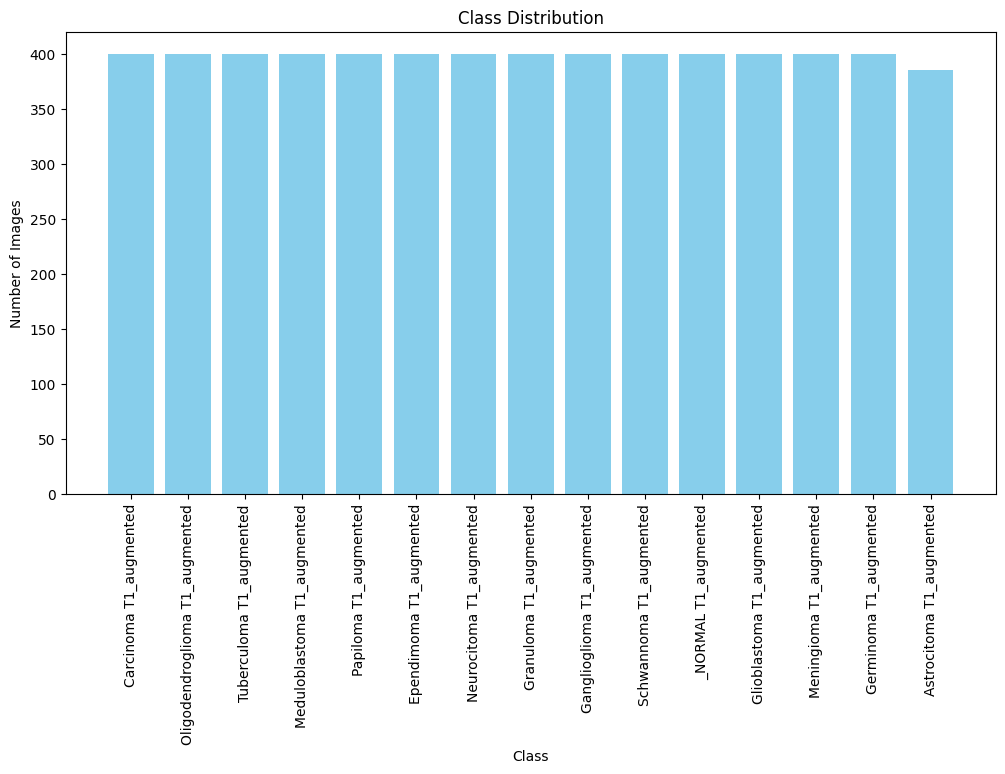

In [7]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_Albumented_Balanced'
import os
class_counts = {}
for class_folder in os.listdir(dataset_folder_path):
    class_path = os.path.join(dataset_folder_path, class_folder)

    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_folder] = num_images

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()



In [ ]:
!pip install autoaugment


ERROR: Could not find a version that satisfies the requirement autoaugment (from versions: none)
ERROR: No matching distribution found for autoaugment


Original Images:


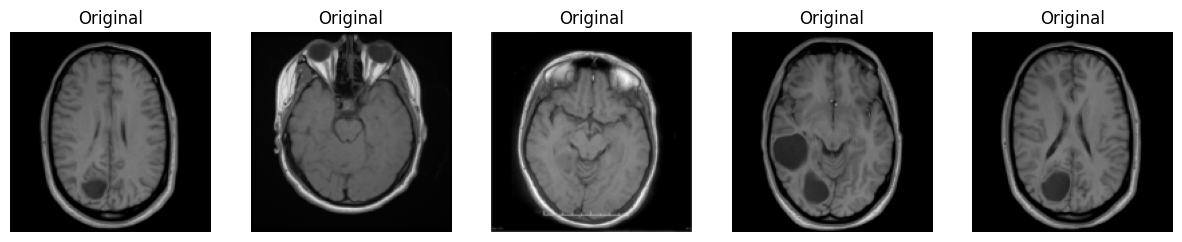

Auto-Augmented Images:


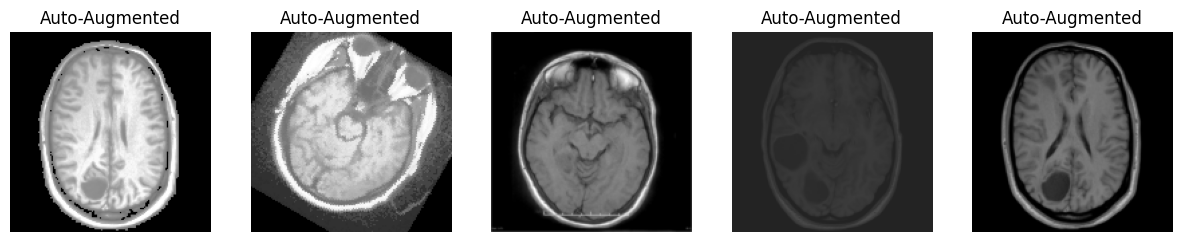

In [8]:
from PIL import Image
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

autoaugment_policy = transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET)

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])


def show_images(images, titles=None, cols=5):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    plt.figure(figsize=(15, rows * 3))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()


image_dir = '/content/drive/MyDrive/Brain_Tumor_44/Ganglioglioma T1'
dataset = CustomDataset(image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


original_images = next(iter(dataloader))


autoaugment_transform = transforms.Compose([
    autoaugment_policy,
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])


augmented_images = [autoaugment_transform(transforms.ToPILImage()(img)) for img in original_images]


original_images_pil = [transforms.ToPILImage()(img) for img in original_images]
augmented_images_pil = [transforms.ToPILImage()(img) for img in augmented_images]


print("Original Images:")
show_images(original_images_pil[:5], titles=['Original'] * 5)

print("Auto-Augmented Images:")
show_images(augmented_images_pil[:5], titles=['Auto-Augmented'] * 5)


In [ ]:
import os
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

autoaugment_policy = transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET)

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

autoaugment_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    autoaugment_policy,
])

def show_images(images, titles=None, cols=5):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    plt.figure(figsize=(15, rows * 3))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img.permute(1, 2, 0))
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

def log_augmentations(log_file_path, image_name, augmentations):
    with open(log_file_path, 'a') as log_file:
        log_file.write(f"{image_name}:\n")
        for aug in augmentations:
            log_file.write(f"  {aug}\n")

def save_augmented_images(image_paths, output_dir, num_needed_augmented_images):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    log_file_path = os.path.join(output_dir, 'augmentations_log.txt')
    num_original_images = len(image_paths)
    total_augmented_images = 0

    for image_path in tqdm(image_paths, desc="Processing images"):
        original_image = Image.open(image_path).convert('RGB')
        base_filename = os.path.splitext(os.path.basename(image_path))[0]
        original_output_path = os.path.join(output_dir, f"{base_filename}_orig.jpeg")
        original_image.save(original_output_path)

        image = transform(original_image)
        augmentations = []

        while total_augmented_images < num_needed_augmented_images:
            augmented_image = autoaugment_transform(transforms.ToPILImage()(image))
            augmented_output_path = os.path.join(output_dir, f"{base_filename}_aug_{total_augmented_images + 1}.jpeg")
            augmented_image.save(augmented_output_path)

            augmentations.append(f"Augmented image saved: {augmented_output_path}")
            total_augmented_images += 1

            if total_augmented_images >= num_needed_augmented_images:
                break

        log_augmentations(log_file_path, base_filename, augmentations)

    print(f"Final count of augmented images for class: {total_augmented_images}")

def calculate_num_augmented_images(num_images, target_size):
    return max(0, target_size - num_images)

def process_dataset(dataset_path, output_path, target_size=400):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    else:
        # Cleaning up the output directory
        for class_dir in os.listdir(output_path):
            class_path = os.path.join(output_path, class_dir)
            if os.path.isdir(class_path):
                for f in os.listdir(class_path):
                    os.remove(os.path.join(class_path, f))
                os.rmdir(class_path)

    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(dataset_path, class_dir)
        image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpeg', '.jpg'))]
        num_images = len(image_paths)
        num_needed_augmented_images = calculate_num_augmented_images(num_images, target_size)

        print(f"Processing class '{class_dir}' with {num_images} original images.")
        print(f"Number of augmented images needed: {num_needed_augmented_images}")

        if num_images > 0:
            output_dir = os.path.join(output_path, f"{class_dir}_augmented")
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            else:
                # Cleaning up the class output directory
                for f in os.listdir(output_dir):
                    os.remove(os.path.join(output_dir, f))

            save_augmented_images(image_paths, output_dir, num_needed_augmented_images)

            augmented_image_count = len([f for f in os.listdir(output_dir) if f.endswith(('.jpg', '.jpeg'))])
            print(f"Processed class '{class_dir}': {num_images} original images, augmented to {augmented_image_count} images")

dataset_path = '/content/drive/MyDrive/Brain_Tumor_44'
output_path = '/content/drive/MyDrive/Brain_Tumor_AutoAugmented_Balanced'

process_dataset(dataset_path, output_path)


Processing class 'Carcinoma T1' with 66 original images.
Number of augmented images needed: 334


Processing images: 100%|██████████| 66/66 [00:07<00:00,  9.00it/s]


Final count of augmented images for class: 334
Processed class 'Carcinoma T1': 66 original images, augmented to 400 images
Processing class 'Oligodendroglioma T1' with 86 original images.
Number of augmented images needed: 314


Processing images: 100%|██████████| 86/86 [00:08<00:00, 10.37it/s]


Final count of augmented images for class: 314
Processed class 'Oligodendroglioma T1': 86 original images, augmented to 400 images
Processing class 'Tuberculoma T1' with 28 original images.
Number of augmented images needed: 372


Processing images: 100%|██████████| 28/28 [00:06<00:00,  4.09it/s]


Final count of augmented images for class: 372
Processed class 'Tuberculoma T1': 28 original images, augmented to 400 images
Processing class 'Meduloblastoma T1' with 23 original images.
Number of augmented images needed: 377


Processing images: 100%|██████████| 23/23 [00:06<00:00,  3.39it/s]


Final count of augmented images for class: 377
Processed class 'Meduloblastoma T1': 23 original images, augmented to 400 images
Processing class 'Papiloma T1' with 66 original images.
Number of augmented images needed: 334


Processing images: 100%|██████████| 66/66 [00:07<00:00,  9.39it/s]


Final count of augmented images for class: 334
Processed class 'Papiloma T1': 66 original images, augmented to 400 images
Processing class 'Ependimoma T1' with 45 original images.
Number of augmented images needed: 355


Processing images: 100%|██████████| 45/45 [00:07<00:00,  6.08it/s]


Final count of augmented images for class: 355
Processed class 'Ependimoma T1': 45 original images, augmented to 400 images
Processing class 'Neurocitoma T1' with 130 original images.
Number of augmented images needed: 270


Processing images: 100%|██████████| 130/130 [00:09<00:00, 14.37it/s]


Final count of augmented images for class: 270
Processed class 'Neurocitoma T1': 130 original images, augmented to 400 images
Processing class 'Granuloma T1' with 30 original images.
Number of augmented images needed: 370


Processing images: 100%|██████████| 30/30 [00:06<00:00,  4.53it/s]


Final count of augmented images for class: 370
Processed class 'Granuloma T1': 30 original images, augmented to 400 images
Processing class 'Ganglioglioma T1' with 20 original images.
Number of augmented images needed: 380


Processing images: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]


Final count of augmented images for class: 380
Processed class 'Ganglioglioma T1': 20 original images, augmented to 400 images
Processing class 'Schwannoma T1' with 148 original images.
Number of augmented images needed: 252


Processing images: 100%|██████████| 148/148 [00:11<00:00, 13.25it/s]


Final count of augmented images for class: 252
Processed class 'Schwannoma T1': 148 original images, augmented to 400 images
Processing class '_NORMAL T1' with 251 original images.
Number of augmented images needed: 149


Processing images: 100%|██████████| 251/251 [00:12<00:00, 20.12it/s]


Final count of augmented images for class: 149
Processed class '_NORMAL T1': 251 original images, augmented to 400 images
Processing class 'Glioblastoma T1' with 55 original images.
Number of augmented images needed: 345


Processing images: 100%|██████████| 55/55 [00:06<00:00,  8.04it/s]


Final count of augmented images for class: 345
Processed class 'Glioblastoma T1': 55 original images, augmented to 400 images
Processing class 'Meningioma T1' with 272 original images.
Number of augmented images needed: 128


Processing images: 100%|██████████| 272/272 [00:12<00:00, 21.63it/s]


Final count of augmented images for class: 128
Processed class 'Meningioma T1': 272 original images, augmented to 400 images
Processing class 'Germinoma T1' with 27 original images.
Number of augmented images needed: 373


Processing images: 100%|██████████| 27/27 [00:06<00:00,  4.19it/s]


Final count of augmented images for class: 373
Processed class 'Germinoma T1': 27 original images, augmented to 400 images
Processing class 'Astrocitoma T1' with 176 original images.
Number of augmented images needed: 224


Processing images: 100%|██████████| 176/176 [00:10<00:00, 17.38it/s]

Final count of augmented images for class: 224
Processed class 'Astrocitoma T1': 176 original images, augmented to 385 images


Class: Carcinoma T1_augmented, Number of images: 400
Class: Oligodendroglioma T1_augmented, Number of images: 400
Class: Tuberculoma T1_augmented, Number of images: 400
Class: Meduloblastoma T1_augmented, Number of images: 400
Class: Papiloma T1_augmented, Number of images: 400
Class: Ependimoma T1_augmented, Number of images: 400
Class: Neurocitoma T1_augmented, Number of images: 400
Class: Granuloma T1_augmented, Number of images: 400
Class: Ganglioglioma T1_augmented, Number of images: 400
Class: Schwannoma T1_augmented, Number of images: 400
Class: _NORMAL T1_augmented, Number of images: 400
Class: Glioblastoma T1_augmented, Number of images: 400
Class: Meningioma T1_augmented, Number of images: 400
Class: Germinoma T1_augmented, Number of images: 400
Class: Astrocitoma T1_augmented, Number of images: 385


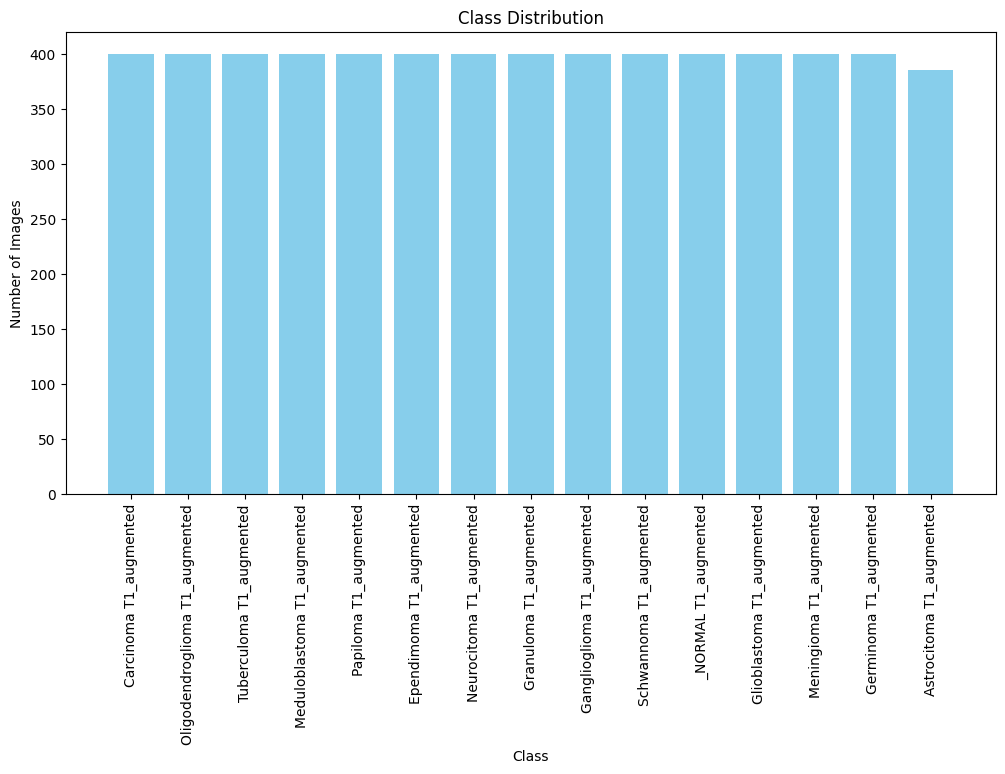

In [ ]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_AutoAugmented_Balanced'
import os
class_counts = {}
for class_folder in os.listdir(dataset_folder_path):
    class_path = os.path.join(dataset_folder_path, class_folder)

    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_folder] = num_images

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

